# 时间序列的处理

在金融数据分析中，最经常遇到的数据就是金融时间序列

时间序列相较于普通的截面数据，有自身的一些特殊需求，如数据时间频率的转换，交易日非交易日的处理等等

pandas针对金融时间序列的特殊数据分析需求，专门开发了一系列用于时间处理的操作

但在学习这些操作之前，我们需要先了解，python是如何存储时间的。

## python的时间模块——datetime模块

在我们的数据库系统里，时间是一个很重要的组成部分，日常最方便的表示时间的方式就是8位字符串或者是8位数字

例如，2008年1月1日，可以用字符串表示为"20080101"，或用数字表示为20080101

但仅仅使用数字或字符串表示时间，仅仅具有 __区分功能__ ，而没有 __运算功能__

意思是可以通过字符串和数字的不同表示不同的时间，但是却无法进行时间的各种运算如时间偏移，频率转换

例如20080131之后一天，如果直接加1的话，得到的是20080132，不是一个合法的时间格式

然而自己写函数进行判断麻烦且没有必要，因为python通过datetime模块较好的解决了这个问题

首先我们import datetime模块

In [62]:
import datetime

使用datetime模块里的datetime类可以表示时间

In [63]:
dt = datetime.datetime(2008, 1, 1)

#### 注意是datetime模块里的datetime类，datetime.datetime才可以访问，很多初学者容易直接键入datetime

#### datetime是模块
#### datetime.datetime才是类

最简单的构造datetime的方式是通过构造函数（注意datetime.datetime的构造函数是支持输入小时和分钟，秒等的，但是我们基本上遇不到高频数据，所以在后面的分析中，我们不会接触到日频率以下的表示）

### 构建datetime对象及与时间字符串的转换

构建一个datetime对象可以通过以下几种方式：

1.直接调用datetime.datetime的构造函数

In [64]:
dt = datetime.datetime(2008, 1, 1)
dt

datetime.datetime(2008, 1, 1, 0, 0)

In [65]:
dt.year

2008

In [66]:
dt.month

1

In [67]:
dt.day

1

2.通过时间字符串格式化得到

In [68]:
dt_str = "20090101"
dt = datetime.datetime.strptime(dt_str, "%Y%m%d")
dt

datetime.datetime(2009, 1, 1, 0, 0)

%加字母用来表示时间格式  %Y表示4位数字年份，%m表示2位数字月份，%d表示2位数字的日期

%Y%m%d格式就会将前4位数字识别为年份，随后的2位数字识别为月份，再随后的2位数字识别为日期。  
如果字符串和格式不匹配就会报错

In [69]:
dt_str = "20092-01-01"
dt = datetime.datetime.strptime(dt_str, "%Y-%m-%d")
dt

ValueError: time data '20092-01-01' does not match format '%Y-%m-%d'

In [70]:
dt_str = "2009-01-31"
dt = datetime.datetime.strptime(dt_str, "%Y-%m-%d")
dt

datetime.datetime(2009, 1, 31, 0, 0)

当然除了这三个时间格式还有很多其他的时间格式

%y 两位数的年份表示（00-99） 

%Y 四位数的年份表示（0000-9999）

%m 月份（01-12）

%d 月内中的一天（00-31）

%H 24小时制小时数（00-23）

%I 12小时制小时数（01-12）

%M 分钟数（00-59）

%S 秒（00-59）

%a 本地简化星期名称 (Thu)

%A 本地完整星期名称 (Thursday)

%b 本地简化的月份名称 (Jan)

%B 本地完整的月份名称 (January)

%c 本地相应的日期表示和时间表示 (Thu Jan  1 00:00:00 2009)

%j 年内的一天（001-366）

%p 本地A.M.或P.M.的等价符

%U 一年中的星期数（00-53）星期天为星期的开始

%w 星期（0-6），星期天为星期的开始

%W 一年中的星期数（00-53）星期一为星期的开始

%x 本地相应的日期表示 (01/31/09)

%X 本地相应的时间表示 (00:00:00)

%Z 当前时区的名称 

当然大多数我们都用不到

datetime.datetime.strptime方法用来将字符串转换为datetime.datetime对象       
也可以使用datetime.datetime.strftime方法将datetime.datetime对象转换成一定格式的字符串    
这种字符串与datetime.datetime对象的互相转换是非常常用的   

In [71]:
dt

datetime.datetime(2009, 1, 31, 0, 0)

In [72]:
dt.strftime("%Y%m%d")

'20090131'

In [73]:
dt.strftime("%Y-%m-%d")

'2009-01-31'

In [74]:
dt.strftime("%Y-%m-%d %H:%M:%S")

'2009-01-31 00:00:00'

例如，我们有一个列表里，全是8位字符串（例如"20090101"）的时间，想转换成靠直线连接年月日的字符串（"2009-01-01"）

In [75]:
dt_str_list1 = ["20090101", "20090102", "20090103", "20090104", "20090105"]
dt_str_list2 = [datetime.datetime.strptime(dt_str, "%Y%m%d").strftime("%Y-%m-%d") for dt_str in dt_str_list1]
dt_str_list2

['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04', '2009-01-05']

### datetime对象的运算

对时间进行偏移运算，需要使用datetime.timedelta对象

In [76]:
dt

datetime.datetime(2009, 1, 31, 0, 0)

In [77]:
dt + datetime.timedelta(1)

datetime.datetime(2009, 2, 1, 0, 0)

In [78]:
dt + datetime.timedelta(5)

datetime.datetime(2009, 2, 5, 0, 0)

In [79]:
dt + datetime.timedelta(1)*2

datetime.datetime(2009, 2, 2, 0, 0)

## pandas对于时间的处理

In [80]:
import pandas as pd
import numpy as np

当将一个全为datetime.datetime对象的集合数据结构转换为pandas中的数据类型时（Index Series），pandas会自动识别，并将其转换为特定类型

例如

In [81]:
dt_list = [datetime.datetime(2008, 1, 1), datetime.datetime(2008, 1, 2), datetime.datetime(2008, 1, 3), datetime.datetime(2008, 1, 4)]

In [82]:
dt_list

[datetime.datetime(2008, 1, 1, 0, 0),
 datetime.datetime(2008, 1, 2, 0, 0),
 datetime.datetime(2008, 1, 3, 0, 0),
 datetime.datetime(2008, 1, 4, 0, 0)]

In [83]:
pd.Series(dt_list)

0   2008-01-01
1   2008-01-02
2   2008-01-03
3   2008-01-04
dtype: datetime64[ns]

注意这里的Series的dtype不是常见的int64 float64 object，而是专门用来存储时间的datetime64[ns]

In [84]:
pd.Index(dt_list)

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04'], dtype='datetime64[ns]', freq=None)

转换为Index则会自动识别时间并生成专用的DatetimeIndex，DatetimeIndex也是一种Index，Index有的属性和方法他都有，但是他还有Index没有的一些专门处理时间的属性和方法（实际上DatetimeIndex类是继承自Index类的，感兴趣的可以百度 python类的继承，不感兴趣可以无视）


当然有的时候是从一个全为时间字符串的集合数据结构进行转换的，pandas提供了to_datetime函数

In [85]:
dt_str_list1 = ["20090101", "20090102", "20090103", "20090104", "20090105"]
dt_str_list2 = ["2009-01-01", "2009-01-02", "2009-01-03", "2009-01-04", "2009-01-05"]
dt_str_ser1 = pd.Series(dt_str_list1)
dt_str_ser2 = pd.Series(dt_str_list2)

In [86]:
pd.to_datetime(dt_str_list1)

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05'],
              dtype='datetime64[ns]', freq=None)

In [87]:
pd.to_datetime(dt_str_list2)

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05'],
              dtype='datetime64[ns]', freq=None)

转list会自动生成DatetimeIndex（因为大多数情况下我们将时间转换成pandas里的数据结构，都是想用作Index，所以pd.to_datetime函数设计的时候就默认了生成的数据结构）

In [88]:
当然转Series就是

NameError: name '当然转Series就是' is not defined

In [89]:
pd.to_datetime(dt_str_ser1)

0   2009-01-01
1   2009-01-02
2   2009-01-03
3   2009-01-04
4   2009-01-05
dtype: datetime64[ns]

In [90]:
pd.to_datetime(dt_str_ser2)

0   2009-01-01
1   2009-01-02
2   2009-01-03
3   2009-01-04
4   2009-01-05
dtype: datetime64[ns]

通过上面的例子我们可以发现，常用的"%Y%m%d"或"%Y-%m-%d"格式的时间字符串会被自动识别

如果想要转换特定格式的字符串，也可以传入format参数  
比如下面的例子里，我们将月份和天数调换顺序，默认的识别方式就无法识别了

In [91]:
dt_str_list3 = ["2009-01-01", "2009-02-01", "2009-03-01", "2009-04-01", "2009-05-01", "2009-31-01"]
pd.to_datetime(dt_str_list3)

ValueError: month must be in 1..12

指定了format之后就可以识别了

In [92]:
pd.to_datetime(dt_str_list3, format="%Y-%d-%m")

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-31'],
              dtype='datetime64[ns]', freq=None)

需要注意的是，无论是DatetimeIndex还是dtype为datetime64[ns]的Series，这些容器里的元素已经不是datetime.datetime对象了，而是pandas里的TimeStamp对象

In [93]:
dt_list = [datetime.datetime(2008, 1, 1), datetime.datetime(2008, 1, 2), datetime.datetime(2008, 1, 3), datetime.datetime(2008, 1, 4)]
dt_ser = pd.Series(dt_list)

In [94]:
dt_list[0]

datetime.datetime(2008, 1, 1, 0, 0)

In [95]:
type(dt_list[0])

datetime.datetime

In [96]:
dt_ser[0]

Timestamp('2008-01-01 00:00:00')

In [97]:
type(dt_ser[0])

pandas._libs.tslibs.timestamps.Timestamp

pandas.TimeStamp是pandas在datetime.datetime对象的基础上，进行了一些包装，但是datetime.datetime有的属性和方法TimeStamp都有，如year属性，strftime方法等等。

In [98]:
time_stamp = dt_ser[0]
time_stamp

Timestamp('2008-01-01 00:00:00')

In [99]:
time_stamp.year

2008

In [100]:
time_stamp.strftime("%Y%m%d")

'20080101'

大家可以理解为TimeStamp和datetime.datetime基本没有区别，大家不要对此产生困惑，pandas不用原始的datetime.datetime，而是自己又建立了一个类TimeStamp的原因可能是出于内部实现的考虑，我们不需要知道细节。

pd.to_datetime的用法很广泛，接收的参数也不一定得是list或是Series，单独的时间字符串也是可以的

In [101]:
pd.to_datetime("20080101")

Timestamp('2008-01-01 00:00:00')

### DatetimeIndex的介绍

金融时间序列数据经常需要以时间作为index，pandas里专门提供了一种元素全为时间（TimeStamp）的index，即DatetimeIndex

构建DatetimeIndex的方法主要有两种  
1.直接调用DatetimeIndex的构造函数，或者使用to_datetime函数构建

In [102]:
dt_str_list = ["2009-01-01", "2009-01-02", "2009-01-03", "2009-01-04", "2009-01-05"]

In [103]:
pd.DatetimeIndex(dt_str_list)

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05'],
              dtype='datetime64[ns]', freq=None)

In [104]:
pd.to_datetime(dt_str_list)

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05'],
              dtype='datetime64[ns]', freq=None)

2.使用pd.date_range函数生成

给定开始时间和结束时间

In [105]:
pd.date_range("2008-01-01", "2008-01-05")

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05'],
              dtype='datetime64[ns]', freq='D')

给定开始时间和需要生成的DatetimeIndex长度

In [106]:
pd.date_range("2008-01-01", periods=6)

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05', '2008-01-06'],
              dtype='datetime64[ns]', freq='D')

可以用freq参数改变频率，常见的如"m"月份，"w-mon"周一等等

In [107]:
pd.date_range("2008-01-01", "2008-12-31", freq="m")

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31'],
              dtype='datetime64[ns]', freq='M')

In [108]:
pd.date_range("2008-01-01", "2008-12-31", freq="w-mon")

DatetimeIndex(['2008-01-07', '2008-01-14', '2008-01-21', '2008-01-28',
               '2008-02-04', '2008-02-11', '2008-02-18', '2008-02-25',
               '2008-03-03', '2008-03-10', '2008-03-17', '2008-03-24',
               '2008-03-31', '2008-04-07', '2008-04-14', '2008-04-21',
               '2008-04-28', '2008-05-05', '2008-05-12', '2008-05-19',
               '2008-05-26', '2008-06-02', '2008-06-09', '2008-06-16',
               '2008-06-23', '2008-06-30', '2008-07-07', '2008-07-14',
               '2008-07-21', '2008-07-28', '2008-08-04', '2008-08-11',
               '2008-08-18', '2008-08-25', '2008-09-01', '2008-09-08',
               '2008-09-15', '2008-09-22', '2008-09-29', '2008-10-06',
               '2008-10-13', '2008-10-20', '2008-10-27', '2008-11-03',
               '2008-11-10', '2008-11-17', '2008-11-24', '2008-12-01',
               '2008-12-08', '2008-12-15', '2008-12-22', '2008-12-29'],
              dtype='datetime64[ns]', freq='W-MON')

In [109]:
pd.date_range("2008-01-01", "2008-12-31", freq="w-thu")

DatetimeIndex(['2008-01-03', '2008-01-10', '2008-01-17', '2008-01-24',
               '2008-01-31', '2008-02-07', '2008-02-14', '2008-02-21',
               '2008-02-28', '2008-03-06', '2008-03-13', '2008-03-20',
               '2008-03-27', '2008-04-03', '2008-04-10', '2008-04-17',
               '2008-04-24', '2008-05-01', '2008-05-08', '2008-05-15',
               '2008-05-22', '2008-05-29', '2008-06-05', '2008-06-12',
               '2008-06-19', '2008-06-26', '2008-07-03', '2008-07-10',
               '2008-07-17', '2008-07-24', '2008-07-31', '2008-08-07',
               '2008-08-14', '2008-08-21', '2008-08-28', '2008-09-04',
               '2008-09-11', '2008-09-18', '2008-09-25', '2008-10-02',
               '2008-10-09', '2008-10-16', '2008-10-23', '2008-10-30',
               '2008-11-06', '2008-11-13', '2008-11-20', '2008-11-27',
               '2008-12-04', '2008-12-11', '2008-12-18', '2008-12-25'],
              dtype='datetime64[ns]', freq='W-THU')

freq可选的取值有如下，基本满足所需，如有特殊需要需自定义，较为麻烦，有兴趣可以问我（如每年1，4，7，10月的第二个交易日星期五之类的）

### DatetimeIndex的索引

In [44]:
df = pd.DataFrame(np.random.randn(60, 5),
             index=pd.date_range("2010-01-01", periods=60),
             columns=["000001.SZ", "000002.SZ", "000003.SZ", "000004.SZ", "000005.SZ"])

In [45]:
df

000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ
2010-01-01  -0.655183  -0.321354  -0.307227  -1.269616   0.424147
2010-01-02   1.876814  -1.823527   0.504216  -1.301826  -0.271545
2010-01-03   0.387241  -0.575357   0.149791  -0.978833  -1.574962
2010-01-04   0.472071   0.482131   1.501535   0.052723  -1.268342
2010-01-05   1.817518  -0.129989  -0.076084   0.577732   0.162989
2010-01-06  -0.363124  -0.914696  -0.447371  -2.105871  -0.533368
2010-01-07  -0.004841  -0.363090  -0.888242  -0.240832  -1.215483
2010-01-08   0.607764  -0.612366   0.534068  -0.338073   2.307136
2010-01-09   0.533676  -0.233975  -0.623750   0.613589  -1.032501
2010-01-10  -0.745895  -0.126659   0.381362   1.577201  -1.758944
2010-01-11  -0.444494  -0.008879  -0.627091  -0.411450  -1.215543
2010-01-12  -1.251062   0.249322  -0.465512  -0.186927  -0.078479
2010-01-13   2.245126  -0.757069   0.335131  -1.314730   0.655315
2010-01-14  -0.124218   1.563207  -1.692259  -0.783553   1.575853
2010-01-15   0.710319  -0.327731   0.237531  -1.607528  -0.268771
2010-01-16   0.909049   0.147356   1.790423  -1.637463  -0.405912
2010-01-17   1.201060  -0.158842  -1.157681   0.318260  -0.761615
2010-01-18  -0.681022   0.128430   0.377668  -0.200696  -1.978701
2010-01-19   1.191099  -0.177524   1.243006  -1.078328   0.378104
2010-01-20   0.480415  -1.277996  -1.495456   0.537473   0.395788
2010-01-21   0.193074   1.744738   1.847877  -0.619220   0.234047
2010-01-22   0.009525  -0.256322   0.106942  -0.514226   1.302217
2010-01-23   0.811436   0.719517  -0.071695   0.112865  -0.533600
2010-01-24   0.533945  -0.854854   0.823262  -0.124607   2.176878
2010-01-25   0.647420  -1.152230   0.826448  -0.917160   2.403150
2010-01-26   0.024623   0.491169  -0.234296   1.340364   0.222323
2010-01-27   0.211404   0.810966   1.337954  -0.749267   0.002906
2010-01-28  -0.943419   0.184246   0.603500   0.987846   0.449385
2010-01-29   0.365125  -0.999148   0.507263  -0.872919  -0.024407
2010-01-30  -0.384773  -2.170311  -0.607443  -0.620483  -0.872277
2010-01-31   0.453049  -0.005340  -2.117622  -0.092851   0.978273
2010-02-01  -0.574140   0.500905   0.917342  -0.205741   0.847811
2010-02-02  -0.966259   1.308249   1.973468   0.807602   1.790949
2010-02-03   0.742764  -1.135275   0.817245   0.847522   0.817661
2010-02-04   0.264431   0.426858  -0.207210  -0.357112   0.009452
2010-02-05  -0.113237   0.515417  -0.353900  -0.250245   0.715823
2010-02-06  -0.027496   0.957665   0.287068  -0.608993   1.603150
2010-02-07   0.444012   0.357529   1.106892  -0.192699  -0.408744
2010-02-08   0.126679  -0.208966  -0.445890  -0.046530  -0.868133
2010-02-09   0.457656  -2.216723   0.214021  -0.626066   0.710364
2010-02-10  -0.474248   1.392622   0.625108   0.219291   0.470890
2010-02-11  -0.273302   2.082758   0.162748   0.056419  -0.425678
2010-02-12   1.979502  -0.342159  -1.350567  -1.286965   0.072088
2010-02-13  -0.238107  -0.340713  -0.521833  -0.192313  -0.458134
2010-02-14   0.249069   1.406522   0.272866   1.439817   1.089975
2010-02-15  -0.390057   0.082288  -0.457162   1.235384  -0.800533
2010-02-16  -0.439993  -0.933017   0.905623  -0.205515   0.091787
2010-02-17   1.723033  -0.143178   2.210013  -1.061063  -0.920447
2010-02-18  -1.542206  -2.264992   1.630711   1.156350  -2.416302
2010-02-19  -0.190758   1.194973  -1.928134   0.580780   0.679400
2010-02-20   2.105628   0.381765  -0.029196  -0.052984   0.464516
2010-02-21   1.454062   0.332189  -0.555919  -1.888447  -0.997750
2010-02-22   1.820230  -0.060747  -0.744759  -1.322571  -1.277660
2010-02-23  -0.194137  -1.264213   0.443701   1.849496  -1.715027
2010-02-24  -0.964377   0.374387   0.788107   1.295230  -1.520727
2010-02-25  -0.920951  -1.347629  -1.409718  -0.009630   0.248491
2010-02-26  -0.127379  -0.456582   1.651050  -1.314585  -1.562349
2010-02-27   1.265166  -1.108461  -1.923608   0.504066  -1.251394
2010-02-28  -0.388485  -0.824086  -0.188841  -0.606532  -0.302887
2010-03-01  -0.416086  -0.952195  -0.863350   0.4868

带有DatetimeIndex的对象索引是比较特殊的，因为pandas为了使用上的便捷性优化了索引方法

例如，我们想要选取2010年2月28日对应的这一行

例如，虽然我们的DatetimeIndex的元素实际上是一个个TimeStamp，但我们并没有必要先构造一个TimeStamp，再将这个TimeStamp传入进行索引（当然这样做是可以的）

In [46]:
dt_str = "2010-02-28"
dt_ts = pd.to_datetime(dt_str)
dt_ts

Timestamp('2010-02-28 00:00:00')

In [47]:
df.loc[dt_ts, :]

000001.SZ   -0.388485
000002.SZ   -0.824086
000003.SZ   -0.188841
000004.SZ   -0.606532
000005.SZ   -0.302887
Name: 2010-02-28 00:00:00, dtype: float64

事实上直接传入时间字符串就够了，在使用DatetimeIndex进行索引时，pandas会自动将我们输入的字符串转换成TimeStamp再进行索引。

In [48]:
df.loc["2010-02-28", :]

000001.SZ   -0.388485
000002.SZ   -0.824086
000003.SZ   -0.188841
000004.SZ   -0.606532
000005.SZ   -0.302887
Name: 2010-02-28 00:00:00, dtype: float64

时间序列还提供了特殊的索引方式，如选取2010年2月的数据可以按照如下选取，当然按照年份取也是可以的

In [49]:
df.loc["2010-02", :]

000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ
2010-02-01  -0.574140   0.500905   0.917342  -0.205741   0.847811
2010-02-02  -0.966259   1.308249   1.973468   0.807602   1.790949
2010-02-03   0.742764  -1.135275   0.817245   0.847522   0.817661
2010-02-04   0.264431   0.426858  -0.207210  -0.357112   0.009452
2010-02-05  -0.113237   0.515417  -0.353900  -0.250245   0.715823
2010-02-06  -0.027496   0.957665   0.287068  -0.608993   1.603150
2010-02-07   0.444012   0.357529   1.106892  -0.192699  -0.408744
2010-02-08   0.126679  -0.208966  -0.445890  -0.046530  -0.868133
2010-02-09   0.457656  -2.216723   0.214021  -0.626066   0.710364
2010-02-10  -0.474248   1.392622   0.625108   0.219291   0.470890
2010-02-11  -0.273302   2.082758   0.162748   0.056419  -0.425678
2010-02-12   1.979502  -0.342159  -1.350567  -1.286965   0.072088
2010-02-13  -0.238107  -0.340713  -0.521833  -0.192313  -0.458134
2010-02-14   0.249069   1.406522   0.272866   1.439817   1.089975
2010-02-15  -0.390057   0.082288  -0.457162   1.235384  -0.800533
2010-02-16  -0.439993  -0.933017   0.905623  -0.205515   0.091787
2010-02-17   1.723033  -0.143178   2.210013  -1.061063  -0.920447
2010-02-18  -1.542206  -2.264992   1.630711   1.156350  -2.416302
2010-02-19  -0.190758   1.194973  -1.928134   0.580780   0.679400
2010-02-20   2.105628   0.381765  -0.029196  -0.052984   0.464516
2010-02-21   1.454062   0.332189  -0.555919  -1.888447  -0.997750
2010-02-22   1.820230  -0.060747  -0.744759  -1.322571  -1.277660
2010-02-23  -0.194137  -1.264213   0.443701   1.849496  -1.715027
2010-02-24  -0.964377   0.374387   0.788107   1.295230  -1.520727
2010-02-25  -0.920951  -1.347629  -1.409718  -0.009630   0.248491
2010-02-26  -0.127379  -0.456582   1.651050  -1.314585  -1.562349
2010-02-27   1.265166  -1.108461  -1.923608   0.504066  -1.251394
2010-02-28  -0.388485  -0.824086  -0.188841  -0.606532  -0.302887

### DatetimeIndex的一些有用的属性和方法

In [50]:
dt_index = pd.date_range("2008-01-01", "2008-01-10")

In [51]:
dt_index

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05', '2008-01-06', '2008-01-07', '2008-01-08',
               '2008-01-09', '2008-01-10'],
              dtype='datetime64[ns]', freq='D')

In [52]:
dt_index.year

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008], dtype='int64')

In [53]:
dt_index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='int64')

In [54]:
dt_index.day

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [55]:
dt_index.is_month_start

array([ True, False, False, False, False, False, False, False, False,
       False])

不一一列举，详细常用属性见下表：

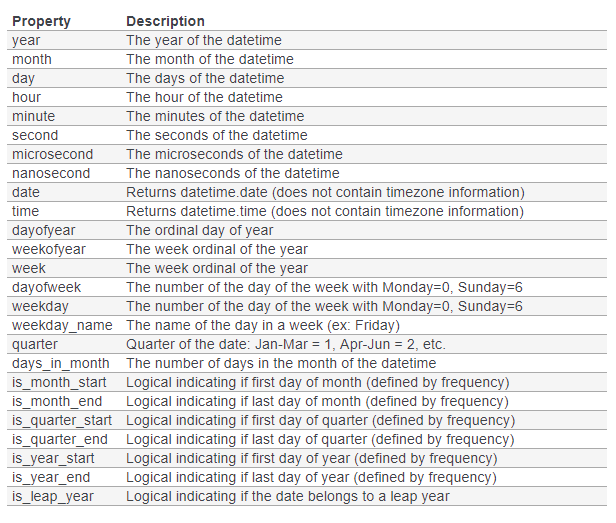

### 用resample方法进行时间序列频率转换

我们先使用随机数生成一连串的随机收益率序列

In [56]:
# bdate_range生成的日期index和date_range最大的区别就是bdate_range不包括双休日
# 由于是模拟收益率，我们暂时没考虑交易日
return_df = pd.DataFrame(np.random.randn(700, 5),
             index=pd.bdate_range("2010-01-01", periods=700),
             columns=["000001.SZ", "000002.SZ", "000003.SZ", "000004.SZ", "000005.SZ"])/100

In [57]:
return_df

000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ
2010-01-01   0.011923  -0.006798   0.004778   0.003055   0.001436
2010-01-04  -0.015966   0.018609   0.017955   0.000695  -0.012176
2010-01-05   0.005992  -0.006899  -0.019676  -0.013499  -0.001734
2010-01-06  -0.006502  -0.004100   0.027375  -0.001137  -0.007803
2010-01-07  -0.006654   0.000966  -0.001974   0.008638   0.005917
2010-01-08  -0.010284  -0.009244  -0.006362  -0.003045  -0.001738
2010-01-11  -0.008316   0.003304  -0.009015  -0.001449  -0.000391
2010-01-12   0.001681   0.001795   0.005839  -0.005130   0.003725
2010-01-13  -0.006363   0.008805  -0.003120   0.002292  -0.000788
2010-01-14   0.002740  -0.012595   0.000643  -0.009280   0.025203
2010-01-15  -0.009277  -0.005648   0.013691  -0.000424  -0.001502
2010-01-18   0.004747   0.009152  -0.007938   0.005910  -0.002732
2010-01-19   0.003828  -0.000600   0.010015  -0.001481  -0.012374
2010-01-20  -0.000351  -0.016867   0.000232  -0.013537   0.002558
2010-01-21   0.001495   0.007492   0.014471   0.004847  -0.011636
2010-01-22   0.000755   0.001420  -0.005753   0.009469   0.010075
2010-01-25   0.005414   0.006625  -0.004814  -0.017086  -0.017527
2010-01-26   0.001703   0.017424  -0.014688   0.011620  -0.004603
2010-01-27  -0.010377  -0.010821  -0.003222  -0.001217   0.016963
2010-01-28  -0.000327   0.012750  -0.002378  -0.007789   0.005843
2010-01-29   0.002414  -0.000831   0.008691  -0.006335  -0.000316
2010-02-01  -0.008654   0.006990  -0.003868   0.004331   0.005409
2010-02-02   0.007722   0.022137  -0.012153  -0.021771   0.006020
2010-02-03   0.002037  -0.002978   0.001788   0.007164   0.007413
2010-02-04  -0.018919   0.012672   0.000676  -0.010259   0.006014
2010-02-05   0.000333  -0.010727  -0.001707   0.002311  -0.014840
2010-02-08  -0.020699   0.012502   0.002339   0.011150   0.008731
2010-02-09   0.013135   0.001334  -0.002998  -0.000582  -0.007730
2010-02-10  -0.001679  -0.005849   0.011782   0.018431  -0.001715
2010-02-11   0.002671   0.005283  -0.008373   0.002051  -0.001989
...               ...        ...        ...        ...        ...
2012-07-27  -0.009081  -0.006611   0.022056  -0.003252   0.015715
2012-07-30  -0.001809  -0.022128   0.000389   0.014382  -0.000283
2012-07-31  -0.003310   0.000648  -0.004309   0.015927   0.000075
2012-08-01   0.008527  -0.007337   0.002125  -0.001119   0.000482
2012-08-02   0.014053   0.001214   0.007779   0.003797   0.017060
2012-08-03   0.000319   0.003204   0.003601   0.007352  -0.005436
2012-08-06  -0.001976  -0.015113  -0.004077   0.017450   0.001895
2012-08-07  -0.006855   0.006510   0.006203   0.026842   0.004607
2012-08-08   0.000277  -0.006220   0.013487  -0.012218  -0.002364
2012-08-09  -0.000718   0.005691  -0.011610   0.008221  -0.010245
2012-08-10   0.008927   0.003745  -0.004918  -0.004437   0.017303
2012-08-13   0.014927   0.010998   0.000890  -0.001423   0.005927
2012-08-14  -0.001529  -0.010564   0.005453   0.006374   0.008126
2012-08-15   0.017160  -0.000278   0.009926  -0.001664  -0.008920
2012-08-16  -0.003929  -0.004719   0.018240   0.007263   0.004354
2012-08-17   0.003652   0.000804   0.014177  -0.010935   0.001188
2012-08-20  -0.004508  -0.001245   0.006379  -0.001311  -0.015720
2012-08-21  -0.022118  -0.008097   0.012063   0.001662   0.004306
2012-08-22   0.009753   0.009395  -0.001875   0.000141  -0.001644
2012-08-23   0.005674  -0.012561  -0.003828   0.010020  -0.005743
2012-08-24   0.002397   0.014562   0.008699   0.000619   0.005830
2012-08-27  -0.009583   0.002865  -0.019611  -0.005036  -0.004168
2012-08-28  -0.000417   0.005410  -0.000462   0.013134   0.002977
2012-08-29   0.013323   0.001135   0.005826  -0.014735  -0.014606
2012-08-30   0.008694   0.006640   0.009663  -0.008047  -0.013982
2012-08-31   0.006530  -0.006839  -0.010196  -0.000989   0.004532
2012-09-03   0.001615   0.007868  -0.001701   0.012865   0.009297
2012-09-04   0.010121  -0.005728  -0.014624   0.001397   0.004506
2012-09-05   0.001929   0.004035  -0.004320   0.0138

用return_df可以用cumprod函数得到净值(以2010年1月1日前一个交易日的净值为1)

In [58]:
nv_df = (1 + return_df).cumprod()
nv_df

000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ
2010-01-01   1.011923   0.993202   1.004778   1.003055   1.001436
2010-01-04   0.995767   1.011685   1.022818   1.003753   0.989243
2010-01-05   1.001734   1.004706   1.002693   0.990203   0.987528
2010-01-06   0.995220   1.000587   1.030142   0.989078   0.979822
2010-01-07   0.988598   1.001553   1.028109   0.997621   0.985620
2010-01-08   0.978432   0.992295   1.021568   0.994583   0.983908
2010-01-11   0.970295   0.995573   1.012359   0.993142   0.983522
2010-01-12   0.971926   0.997360   1.018270   0.988047   0.987186
2010-01-13   0.965742   1.006141   1.015093   0.990312   0.986408
2010-01-14   0.968389   0.993469   1.015746   0.981121   1.011269
2010-01-15   0.959405   0.987858   1.029653   0.980706   1.009750
2010-01-18   0.963959   0.996899   1.021480   0.986502   1.006991
2010-01-19   0.967649   0.996301   1.031710   0.985041   0.994531
2010-01-20   0.967309   0.979496   1.031949   0.971706   0.997075
2010-01-21   0.968756   0.986834   1.046883   0.976416   0.985472
2010-01-22   0.969487   0.988236   1.040860   0.985661   0.995401
2010-01-25   0.974736   0.994782   1.035849   0.968820   0.977954
2010-01-26   0.976396   1.012116   1.020634   0.980078   0.973453
2010-01-27   0.966264   1.001163   1.017345   0.978885   0.989966
2010-01-28   0.965948   1.013928   1.014926   0.971260   0.995751
2010-01-29   0.968280   1.013085   1.023747   0.965107   0.995436
2010-02-01   0.959901   1.020167   1.019788   0.969287   1.000820
2010-02-02   0.967313   1.042751   1.007395   0.948185   1.006845
2010-02-03   0.969284   1.039645   1.009196   0.954977   1.014308
2010-02-04   0.950945   1.052820   1.009878   0.945180   1.020408
2010-02-05   0.951262   1.041526   1.008154   0.947364   1.005265
2010-02-08   0.931572   1.054548   1.010512   0.957928   1.014042
2010-02-09   0.943808   1.055954   1.007483   0.957370   1.006204
2010-02-10   0.942223   1.049778   1.019353   0.975016   1.004478
2010-02-11   0.944740   1.055324   1.010817   0.977016   1.002480
...               ...        ...        ...        ...        ...
2012-07-27   0.850053   0.919677   1.109218   0.859520   0.779639
2012-07-30   0.848515   0.899327   1.109650   0.871881   0.779418
2012-07-31   0.845707   0.899910   1.104869   0.885768   0.779476
2012-08-01   0.852918   0.893308   1.107217   0.884777   0.779851
2012-08-02   0.864904   0.894393   1.115830   0.888136   0.793155
2012-08-03   0.865180   0.897258   1.119848   0.894666   0.788844
2012-08-06   0.863470   0.883698   1.115282   0.910277   0.790338
2012-08-07   0.857551   0.889451   1.122200   0.934711   0.793980
2012-08-08   0.857788   0.883919   1.137335   0.923291   0.792103
2012-08-09   0.857173   0.888949   1.124131   0.930881   0.783988
2012-08-10   0.864825   0.892278   1.118602   0.926751   0.797554
2012-08-13   0.877734   0.902091   1.119598   0.925433   0.802281
2012-08-14   0.876393   0.892561   1.125704   0.931331   0.808800
2012-08-15   0.891432   0.892313   1.136878   0.929781   0.801586
2012-08-16   0.887930   0.888102   1.157614   0.936534   0.805076
2012-08-17   0.891173   0.888816   1.174026   0.926293   0.806033
2012-08-20   0.887155   0.887710   1.181514   0.925079   0.793363
2012-08-21   0.867533   0.880522   1.195767   0.926616   0.796779
2012-08-22   0.875994   0.888794   1.193525   0.926747   0.795470
2012-08-23   0.880965   0.877629   1.188956   0.936032   0.790901
2012-08-24   0.883076   0.890409   1.199298   0.936612   0.795512
2012-08-27   0.874614   0.892960   1.175779   0.931896   0.792197
2012-08-28   0.874249   0.897791   1.175235   0.944135   0.794555
2012-08-29   0.885897   0.898810   1.182082   0.930224   0.782950
2012-08-30   0.893598   0.904779   1.193505   0.922738   0.772002
2012-08-31   0.899433   0.898591   1.181336   0.921825   0.775501
2012-09-03   0.900886   0.905661   1.179326   0.933684   0.782710
2012-09-04   0.910004   0.900474   1.162080   0.934989   0.786237
2012-09-05   0.911759   0.904107   1.157059   0.9479

将净值数据由日频转换为月频，我们通常需要以每个月最后一天净值作为该月净值就可以了

In [59]:
nv_df.resample("m").last()

000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ
2010-01-31   0.968280   1.013085   1.023747   0.965107   0.995436
2010-02-28   0.899993   1.014233   0.969755   0.960130   1.007542
2010-03-31   0.969803   0.971505   1.018302   0.901023   1.039641
2010-04-30   0.973192   0.902567   1.096964   0.910085   1.106918
2010-05-31   0.939599   0.841835   1.061787   0.993191   1.002989
2010-06-30   0.908706   0.872803   0.934434   0.972775   0.970913
2010-07-31   0.862549   0.920502   0.892108   0.994319   0.879233
2010-08-31   0.862082   0.909000   0.982592   0.996697   0.907708
2010-09-30   0.901177   0.894078   0.953046   1.036889   0.875995
2010-10-31   0.874573   0.901366   0.980267   0.960864   0.849154
2010-11-30   0.867616   0.818063   1.002226   0.967295   0.806143
2010-12-31   0.890998   0.810000   1.022607   1.040219   0.862035
2011-01-31   0.862088   0.788682   0.982632   0.961889   0.823862
2011-02-28   0.883529   0.793614   1.019892   0.951472   0.804741
2011-03-31   0.842602   0.784657   1.050897   0.976593   0.833320
2011-04-30   0.815184   0.837626   1.004231   0.993844   0.828245
2011-05-31   0.862744   0.851161   0.941642   0.938884   0.825721
2011-06-30   0.879040   0.876662   0.912845   0.803801   0.917076
2011-07-31   0.917383   0.830852   0.965201   0.764499   0.968942
2011-08-31   0.841818   0.855127   1.057211   0.707599   0.918578
2011-09-30   0.860133   0.969865   1.025585   0.672155   0.922726
2011-10-31   0.867523   0.943194   0.969213   0.668165   0.872141
2011-11-30   0.882430   0.897327   0.939207   0.651248   0.861784
2011-12-31   0.803479   0.919521   0.983349   0.709701   0.842775
2012-01-31   0.822266   0.983816   1.043719   0.758727   0.812105
2012-02-29   0.870971   0.907558   1.076008   0.790286   0.830258
2012-03-31   0.795726   0.901361   1.124992   0.819602   0.822042
2012-04-30   0.782527   0.873949   1.110332   0.799863   0.780079
2012-05-31   0.857618   0.930899   1.029238   0.860981   0.773575
2012-06-30   0.850776   0.915378   1.063522   0.832116   0.790979
2012-07-31   0.845707   0.899910   1.104869   0.885768   0.779476
2012-08-31   0.899433   0.898591   1.181336   0.921825   0.775501
2012-09-30   0.920177   0.893181   1.169637   0.942244   0.776197

将收益率由日频转换为月频，我们通常需要计算每个月的收益率和，即 (1+r1)(1+r2)(1+r3)...(1+r31)-1

In [60]:
(1+return_df).resample("m").prod()-1

000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ
2010-01-31  -0.031720   0.013085   0.023747  -0.034893  -0.004564
2010-02-28  -0.070524   0.001132  -0.052740  -0.005157   0.012162
2010-03-31   0.077568  -0.042128   0.050061  -0.061561   0.031859
2010-04-30   0.003494  -0.070960   0.077249   0.010057   0.064713
2010-05-31  -0.034518  -0.067288  -0.032068   0.091317  -0.093891
2010-06-30  -0.032879   0.036787  -0.119941  -0.020556  -0.031981
2010-07-31  -0.050794   0.054650  -0.045296   0.022147  -0.094427
2010-08-31  -0.000541  -0.012496   0.101427   0.002392   0.032386
2010-09-30   0.045350  -0.016416  -0.030069   0.040325  -0.034937
2010-10-31  -0.029522   0.008152   0.028562  -0.073320  -0.030641
2010-11-30  -0.007954  -0.092419   0.022401   0.006693  -0.050651
2010-12-31   0.026950  -0.009855   0.020335   0.075390   0.069332
2011-01-31  -0.032447  -0.026319  -0.039091  -0.075302  -0.044282
2011-02-28   0.024872   0.006254   0.037918  -0.010830  -0.023208
2011-03-31  -0.046322  -0.011287   0.030401   0.026403   0.035513
2011-04-30  -0.032540   0.067507  -0.044406   0.017665  -0.006091
2011-05-31   0.058343   0.016158  -0.062325  -0.055301  -0.003047
2011-06-30   0.018888   0.029960  -0.030582  -0.143876   0.110637
2011-07-31   0.043620  -0.052255   0.057355  -0.048895   0.056555
2011-08-31  -0.082370   0.029218   0.095328  -0.074428  -0.051978
2011-09-30   0.021756   0.134176  -0.029915  -0.050090   0.004516
2011-10-31   0.008592  -0.027500  -0.054966  -0.005936  -0.054822
2011-11-30   0.017183  -0.048629  -0.030959  -0.025320  -0.011875
2011-12-31  -0.089470   0.024733   0.046999   0.089756  -0.022058
2012-01-31   0.023382   0.069922   0.061393   0.069080  -0.036391
2012-02-29   0.059233  -0.077512   0.030936   0.041595   0.022353
2012-03-31  -0.086392  -0.006828   0.045523   0.037094  -0.009896
2012-04-30  -0.016587  -0.030412  -0.013031  -0.024083  -0.051048
2012-05-31   0.095959   0.065164  -0.073035   0.076411  -0.008338
2012-06-30  -0.007977  -0.016673   0.033310  -0.033526   0.022499
2012-07-31  -0.005959  -0.016898   0.038877   0.064476  -0.014543
2012-08-31   0.063529  -0.001466   0.069209   0.040707  -0.005100
2012-09-30   0.023063  -0.006020  -0.009903   0.022151   0.000898

大家会发现这个和groupby的用法很像，除了我们刚刚用的last和sum，实际上还有其他很多可选方法

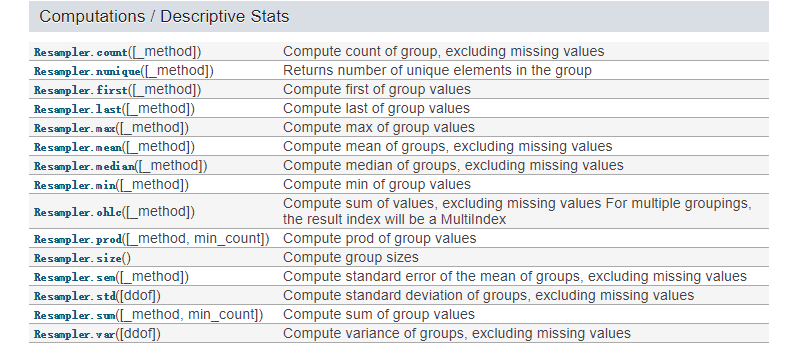

当然，他也可以接收apply方法，用于接收自定义函数

依旧使用我们常用的小技巧，在传入apply的函数里，加上print(),观看resample究竟传入了什么

In [111]:
def myfun(x):
    print(type(x), )
    print(x, "\n\n")
    return 1
nv_df.resample("m").apply(myfun)

<class 'pandas.core.series.Series'>
2010-01-01    1.011923
2010-01-04    0.995767
2010-01-05    1.001734
2010-01-06    0.995220
2010-01-07    0.988598
2010-01-08    0.978432
2010-01-11    0.970295
2010-01-12    0.971926
2010-01-13    0.965742
2010-01-14    0.968389
2010-01-15    0.959405
2010-01-18    0.963959
2010-01-19    0.967649
2010-01-20    0.967309
2010-01-21    0.968756
2010-01-22    0.969487
2010-01-25    0.974736
2010-01-26    0.976396
2010-01-27    0.966264
2010-01-28    0.965948
2010-01-29    0.968280
Name: 000001.SZ, dtype: float64 


<class 'pandas.core.series.Series'>
2010-02-01    0.959901
2010-02-02    0.967313
2010-02-03    0.969284
2010-02-04    0.950945
2010-02-05    0.951262
2010-02-08    0.931572
2010-02-09    0.943808
2010-02-10    0.942223
2010-02-11    0.944740
2010-02-12    0.925727
2010-02-15    0.922469
2010-02-16    0.920297
2010-02-17    0.913297
2010-02-18    0.910871
2010-02-19    0.913013
2010-02-22    0.904233
2010-02-23    0.903352
2010-02-24    0.894

000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ
2010-01-31        1.0        1.0        1.0        1.0        1.0
2010-02-28        1.0        1.0        1.0        1.0        1.0
2010-03-31        1.0        1.0        1.0        1.0        1.0
2010-04-30        1.0        1.0        1.0        1.0        1.0
2010-05-31        1.0        1.0        1.0        1.0        1.0
2010-06-30        1.0        1.0        1.0        1.0        1.0
2010-07-31        1.0        1.0        1.0        1.0        1.0
2010-08-31        1.0        1.0        1.0        1.0        1.0
2010-09-30        1.0        1.0        1.0        1.0        1.0
2010-10-31        1.0        1.0        1.0        1.0        1.0
2010-11-30        1.0        1.0        1.0        1.0        1.0
2010-12-31        1.0        1.0        1.0        1.0        1.0
2011-01-31        1.0        1.0        1.0        1.0        1.0
2011-02-28        1.0        1.0        1.0        1.0        1.0
2011-03-31        1.0        1.0        1.0        1.0        1.0
2011-04-30        1.0        1.0        1.0        1.0        1.0
2011-05-31        1.0        1.0        1.0        1.0        1.0
2011-06-30        1.0        1.0        1.0        1.0        1.0
2011-07-31        1.0        1.0        1.0        1.0        1.0
2011-08-31        1.0        1.0        1.0        1.0        1.0
2011-09-30        1.0        1.0        1.0        1.0        1.0
2011-10-31        1.0        1.0        1.0        1.0        1.0
2011-11-30        1.0        1.0        1.0        1.0        1.0
2011-12-31        1.0        1.0        1.0        1.0        1.0
2012-01-31        1.0        1.0        1.0        1.0        1.0
2012-02-29        1.0        1.0        1.0        1.0        1.0
2012-03-31        1.0        1.0        1.0        1.0        1.0
2012-04-30        1.0        1.0        1.0        1.0        1.0
2012-05-31        1.0        1.0        1.0        1.0        1.0
2012-06-30        1.0        1.0        1.0        1.0        1.0
2012-07-31        1.0        1.0        1.0        1.0        1.0
2012-08-31        1.0        1.0        1.0        1.0        1.0
2012-09-30        1.0        1.0        1.0        1.0        1.0

大家发现实际上他将每列按照时间频率进行切割成Series,再进行输入,编写适当的函数就可以实现自定义操作